## Linear Regression from Scratch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing data from a CSV file.

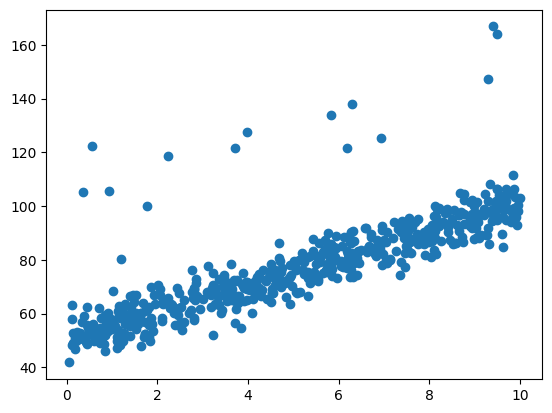

In [3]:
data = pd.read_csv("data.csv")

plt.scatter(data.study_time , data.score)

In linear regression:

The model is defined as:

$$
y = m \cdot x + b
$$

where  
- $x$ = `study_time`  
- $y$ = `score`

The mean squared error (MSE) is calculated as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where  
- $y_i$ = actual `score`  
- $\hat{y}_i$ = predicted `score`  
- $n$ = number of data points

Also, $\hat{y}_i$ can be written as $m x_i + b$.
So,

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))^2
$$

In [6]:
def mse(m,b,data):
    total_error = 0
    
    for i in range(len(data)):
        x = data.iloc[i].study_time
        y = data.iloc[i].score

        total_error +=  (y - (m*x+b))**2
    
    total_error /= float(len(data)) 
    
    return total_error

#### For minimizing the error function
we do this by taking partial dericative of the mse function to find its direction of highest error and go in oposite dirtection the alogrithm is called gradient descent

In [24]:
def gradient_descent(data,current_m,current_b,learning_rate):
    m_gradient = 0
    b_gradient = 0

    n = len(data)

    for i in range(n):
        x = data.iloc[i].study_time
        y = data.iloc[i].score

        m_gradient += -(2/n) * x * (y - (current_m * x + current_b))
        b_gradient += -(2/n) * ( y - (current_m * x + current_b))
    
    new_m = current_m - m_gradient * learning_rate
    new_b = current_b - b_gradient * learning_rate

    return new_m, new_b

### inital variables intialization

In [25]:
m = 0
b = 0
learning_rate = 0.001
epochs = 10000

## training_model

In [26]:
for i in range(epochs):
    m,b = gradient_descent(data,m,b,learning_rate)

Final m: 5.020641928351535 and b: 51.65012457312993 .


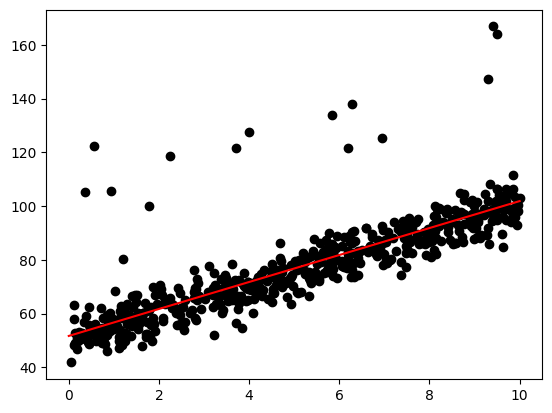

In [30]:
print(f"Final m: {m} and b: {b} .")
plt.scatter(data.study_time,data.score,color="black")
plt.plot(list(range(0, 11)),[m*x+b for x in range (0,11)],color="red")
plt.show()

#### Now we can predict the score directly using the values of m and b and the amount of time spent in hrs studying

In [31]:
time_spent_studying = 4
score = m * time_spent_studying + b

print(f"Predicted score is {score}")

Predicted score is 71.73269228653606
